In [1]:
import numpy as np

In [2]:
class linear_regression():
    def __init__(self, learning_rate, no_of_iteration):
        #initiating learning rate and no. of iteration
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration

    def fit(self, x, y):
        #no. of training example and no. of features
        self.m, self.n = x.shape     #rows and column

        #initating weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        #implementing gradient descent
        for i in range(self.no_of_iteration):
            self.update_weights()

    def update_weights(self):
        y_prediction = self.predict(self.x)

        #calculating gradient 
        dw = -(2 * (self.x.T).dot(self.y - y_prediction))/self.m
        db = -2 * np.sum(self.y - y_prediction)/self.m

        #updating weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, x):
        return x.dot(self.w) + self.b

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
csv_filename = "Salary_Data_modified.csv"
salary_data = pd.read_csv(csv_filename)

In [5]:
salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
salary_data.shape

(31, 2)

In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [9]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [10]:
model = linear_regression(learning_rate = 0.01, no_of_iteration = 10000)

In [11]:
# model.fit(x_train, y_train)
model.fit(x, y)

In [12]:
print(model.w[0], '= weight')
print ('Bias = ', model.b)

9449.962321455143 = weight
Bias =  25792.200198668248


In [13]:
while True:
    user_input = input("Enter years of experience (or type 'q' to exit): ")
    
    if user_input.lower() == 'q':  # Exit condition
        print("Exiting...")
        break
    
    try:
        experience = float(user_input)  # Convert input to float[experience]}

        salary_data_updated = pd.read_csv(csv_filename)
        experience_list = salary_data_updated["YearsExperience"].tolist()
        
        yrs_of_exp = np.array([[experience]])  # Reshape for model
        predicted_salary = model.predict(yrs_of_exp)[0]  # Predict salary
        print(f"Predicted Salary: {predicted_salary}")

        if experience in experience_list:
            salary_data_updated.loc[salary_data_updated["YearsExperience"] == experience, "Salary"] = predicted_salary
            print("Existing data updated in CSV.")
        else:
            # Append new data
            new_row = pd.DataFrame({"YearsExperience": [experience], "Salary": [predicted_salary]})
            salary_data_updated = pd.concat([salary_data_updated, new_row], ignore_index=True)
            print("New data added to CSV.")

        # Save updated data to CSV
        salary_data_updated.to_csv(csv_filename, index=False)

        # Retrain model with updated data
        X_updated = salary_data_updated.iloc[:, :-1].values
        y_updated = salary_data_updated.iloc[:, -1].values
        model.fit(X_updated, y_updated)
        print("Model retrained with updated data.")
    
    except ValueError:  # Handle invalid inputs
        print("Invalid input! Please enter a valid number or 'q' to exit.")

Enter years of experience (or type 'q' to exit):  1


Predicted Salary: 35242.16252012339
New data added to CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  1.1


Predicted Salary: 36187.15875226889
Existing data updated in CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  1.3


Predicted Salary: 37797.315157657926
Existing data updated in CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  4


Predicted Salary: 63048.51900417502
Existing data updated in CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  2.3


Predicted Salary: 47264.91654848679
New data added to CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  6.4


Predicted Salary: 86479.45287603672
New data added to CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  3.5


Predicted Salary: 58742.34181508677
New data added to CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  1


Predicted Salary: 34831.0391763368
Existing data updated in CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  8


Predicted Salary: 101789.0288563742
New data added to CSV.
Model retrained with updated data.


Enter years of experience (or type 'q' to exit):  q


Exiting...


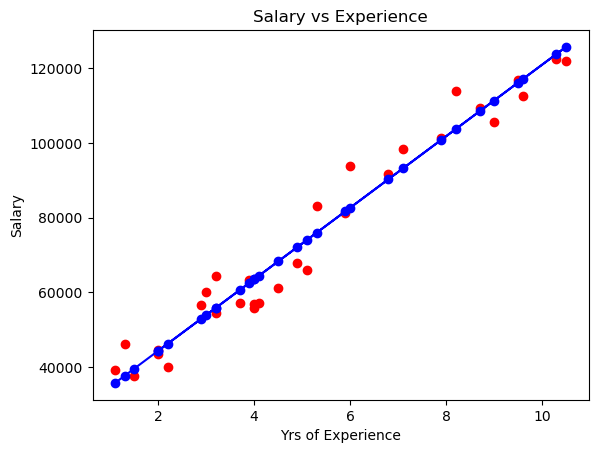

In [14]:
predicted_salaries = model.predict(x.reshape(-1, 1))
plt.scatter(x, y, color = 'red')
plt.scatter(x, predicted_salaries, color = 'blue')
plt.plot(x, predicted_salaries, color = 'blue')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show() 